#Analisti statistica delle amebine

In [73]:
import pandas as pd #manipolazione dati

from scipy import stats #statistica

import csv #manipolazione file csv

In [20]:
%pylab inline
#importa numpy e matplotlib

Populating the interactive namespace from numpy and matplotlib


###Caricamento dei dati

In [21]:
var_time_dataset = open("data.csv")
#questa cella carica i dati. E' sufficiente mettere il nome del file come argomento di open, sempre facendo attenzione
#al path

In [22]:
dataset = pd.read_csv(var_time_dataset, sep=";") #carica il file in dataset. Il separatore dei valori deve essere ;
var_time_dataset.close()
#print dataset #se necessario

In [23]:
matriciona = dataset.as_matrix() #trasforma il DataFrame in un array

In [66]:
num_data = len(matriciona)

time = []
box_dataset = np.zeros(num_data-1)
varx_dataset = np.zeros(num_data-1)
vary_dataset = np.zeros(num_data-1)

for i in range(1,num_data):
    dato = matriciona[i]
    time.append(dato[0])
    box_dataset[i-1] = dato[1]
    varx_dataset[i-1] = dato[2]
    vary_dataset[i-1] = dato[3]

###Analisi dei dati

#####Box coefficient

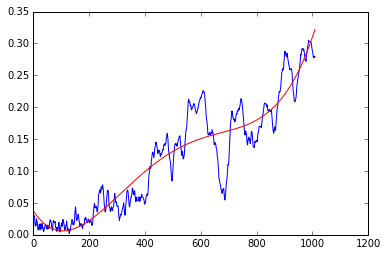

In [67]:
box_fitter = np.polyfit(time,box_dataset,4) #fit polinomiale di grado 4
#box_fitter = np.polyfit(time,log(box_dataset),1) #per un fit esponenziale
y_box = np.polyval(box_fitter,time)
#y_box = exp(np.polyval(box_fitter,time)) #per valutare il fit esponenziale
        
plt.plot(time,box_dataset,"b")
plt.plot(time,y_box,"r")

####Varianze

Power_divergenceResult(statistic=0.016045362531883871, pvalue=1.0)


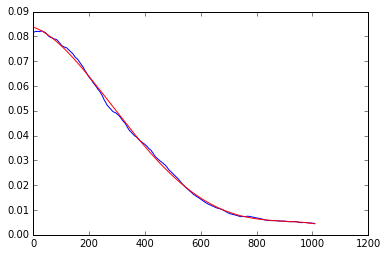

In [74]:
varx_fitter = np.polyfit(time,varx_dataset,4) #fit polinomiale di grado 4
#varx_fitter = np.polyfit(time,log(varx_dataset),1) #per un fit esponenziale
y_varx = np.polyval(varx_fitter,time)
#y_varx = exp(np.polyval(varx_fitter,time)) #per valutare il fit esponenziale
        
plt.plot(time,varx_dataset,"b")
plt.plot(time,y_varx,"r")

print stats.chisquare(varx_dataset,y_varx) #chi quadro

Power_divergenceResult(statistic=0.0082496817259178137, pvalue=1.0)


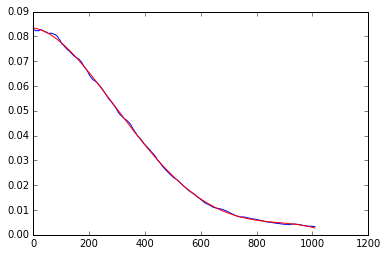

In [75]:
vary_fitter = np.polyfit(time,vary_dataset,4) #fit polinomiale di grado 4
#fitter = np.polyfit(time,log(vary_dataset),1) #per un fit esponenziale
y_vary = np.polyval(vary_fitter,time)
#y_vary = exp(np.polyval(vary_fitter,time)) #per valutare il fit esponenziale
        
plt.plot(time,vary_dataset,"b")
plt.plot(time,y_vary,"r")

print stats.chisquare(vary_dataset,y_vary) #chi quadro

0.00170437581886


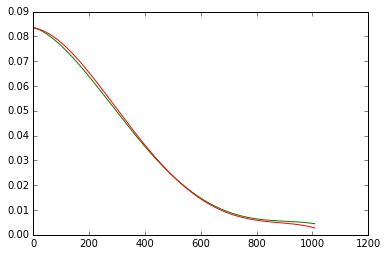

In [76]:
total_divergence = max(abs(y_varx-y_vary)) #potrebbe essere un test di isotropia?
print total_divergence

plt.plot(time,y_varx,"g")
plt.plot(time,y_vary,"r")